### Import Libs

In [1]:
import matplotlib.pyplot as plt
import random as rand

### Create Individual

In [2]:
def create_individual():
    # TODO: create a random chromosome
    chromosome = [1, 2, 3, 4, 5, 6, 7, 8]
    rand.shuffle(chromosome)
    return tuple(chromosome)

### Generate Population

In [3]:
def generate_population(population_size:int = 20):
    population = []

    for _ in range(population_size):
        new_individual = create_individual()
        population.append(new_individual)

    return population

### Parent Selection

In [4]:
def parent_selection(population):
    parents = [(), ()]
    #TODO: choose the pairs of parents
    pop = list(population.keys())
    fits = [population[p] for p in pop]
    while parents[0] == parents[1]:
      parents = rand.choices(population=pop, weights=fits, k=2)
    return parents

### Next Generation Selection

In [5]:
def next_generation_selection(children_population,  population_size):
    next_generation = []
    children_population_sorted = sorted(children_population.items(), key=lambda item: item[1])
    return dict(children_population_sorted[:population_size])

### Crossover

In [6]:
def crossover(parents):

    offsprings = []
    offsprings.append([0,0,0,0,0,0,0,0])
    offsprings.append([0,0,0,0,0,0,0,0])

    # select a random part
    idx1 = rand.randint(0,7)
    idx2 = rand.randint(idx1,7)

    # copy the part from one parent
    for i in range(idx1, idx2+1):
        offsprings[0][i] = parents[0][i]
        offsprings[1][i] = parents[1][i]

    # copy the rest from the other parent
    for prnt in range(len(parents)):
        other_prnt = (prnt+1)%2
        offspring_curr_idx = (idx2+1) % 8
        for i in range(0,8):
            i = (i+idx2+1) % 8
            if parents[prnt][i] not in offsprings[other_prnt]:
                offsprings[other_prnt][offspring_curr_idx] = parents[prnt][i]
                offspring_curr_idx = (offspring_curr_idx+1) % 8

    return [tuple(offsprings[0]), tuple(offsprings[1])]

### Mutation

In [7]:
def mutate(seq):
    #TODO: implement mutate
    p = 0.2
    al1, al2 = rand.sample(range(len(seq)), 2)
    if rand.random() < p:
        seq = list(seq)
        seq[al1], seq[al2] = seq[al2], seq[al1]
    return tuple(seq)

### Score Function

In [8]:
def fitness_score(seq):
    fit_score = 0
    #TODO: calculate fitness score
    for i1 in range(len(seq)):
        for i2 in range(i1+1, len(seq)):
            if abs(i1 - i2) != abs(seq[i1] - seq[i2]):
                fit_score += 1

    return fit_score

## Calculate Population Fitness

In [9]:
def population_fitness(population):
   pop_fitness = 0
   individuals_fitnesses:dict = {}
   for chromosome in population:
        fitness_sc = fitness_score(chromosome)
        pop_fitness += fitness_sc
        individuals_fitnesses[chromosome] = fitness_sc
   return individuals_fitnesses ,pop_fitness

### Termination Condition

In [10]:
def check_end(population) -> bool:
    #TODO: check end of algorithm
    check_end.cycle_limit -= 1
    if 28 in population.values():
        return True

    if check_end.cycle_limit == 0:
        print("Warning: cycle limit reached!")
        return True

    return False

### Run Your Algorithms

In [11]:
    # The genetic algorithm
    population_size = 20
    generation = 0
    solution_is_found = False
    fitness = []
    best_fit = []

    population = generate_population(population_size=population_size)
    population , _ = population_fitness(population)

    check_end.cycle_limit = 300
    while not check_end(population):
        new_population = []
        for i in range(int(population_size/2)):
            pair = parent_selection(population)
            children = crossover(pair)
            new_population += [mutate(c) for c in children]
        new_population , _ = population_fitness(new_population)
        population = next_generation_selection(new_population, population_size=population_size)

        generation += 1
        gen_fitness = sum(list(population.values()))
        avg_fit = gen_fitness / population.__len__()
        best_fit.append(max(list(population.values())))
        fitness.append(avg_fit)


    best = None
    for k,v in population.items():
      if best is None or v > population[best]:
        best = k

    print(f'best reached score = {best_fit[-1]}\nby : {k}')


best reached score = 28
by : (4, 8, 5, 3, 1, 7, 2, 6)


### See Your Progress Over Generations

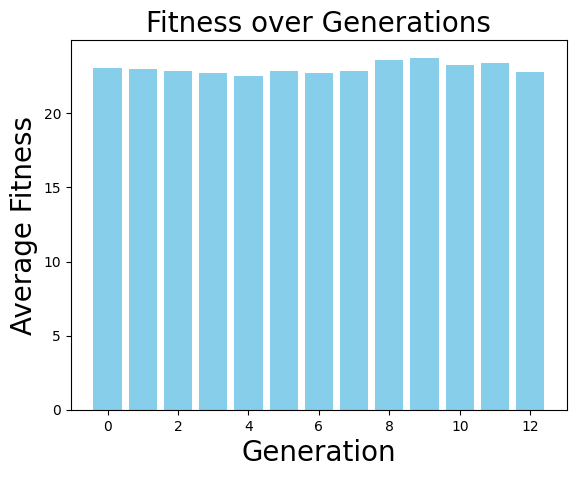

In [12]:
plt.bar(range(generation), fitness, color='skyblue')
plt.xlabel('Generation', fontsize=20)
plt.ylabel('Average Fitness', fontsize=20)
plt.title('Fitness over Generations', fontsize=20)
plt.show()